# **Name: Varun Magotra**
# **Roll Number: 14**
# **Batch: A**

## Part-B: Logistic Regression 

# Load the dataset (Use pandas )

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data', sep = ' ', header = None, na_values='?', names = columns)

In [ ]:
df.head()

,surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,1,2,3,path
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [ ]:
len(df.columns)

28

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      299 non-null    float64
 1   Age                          300 non-null    int64  
 2   Hospital ID                  300 non-null    int64  
 3   rectal temperature           240 non-null    float64
 4   pulse                        276 non-null    float64
 5   respiratory rate             242 non-null    float64
 6   temperature of extremities   244 non-null    float64
 7   peripheral pulse             231 non-null    float64
 8   mucous membranes             253 non-null    float64
 9   capillary refill time        268 non-null    float64
 10  pain                         245 non-null    float64
 11  peristalsis                  256 non-null    float64
 12  abdominal distension         244 non-null    float64
 13  nasogastric tube    

## Cleaning Train dataset

In [ ]:
#Dropping columns having significant number of NaN values
df.drop('nasogastric reflux PH', axis=1, inplace = True)
df.drop('abdomcentesis total protein', axis=1, inplace = True)
df.drop('abdominocentesis appearance', axis=1, inplace = True)
df.drop('nasogastric tube', axis=1, inplace = True)
df.drop('abdomen', axis=1, inplace = True)
df.drop('rectal examination - feces', axis=1, inplace = True)

In [ ]:
df['Age'].replace({9:2}, inplace = True)
df['outcome'].replace({1:'lived', 2:'died', 3:'euthenized'}, inplace = True)
df['Age'].replace({1:'Adult', 2:'Young'}, inplace = True)
df['pain'].replace({1:'No Pain', 2:'Depressed', 3:'Mild pain', 4:'Severe Pain', 5:'Greaterthansevere'}, inplace = True)

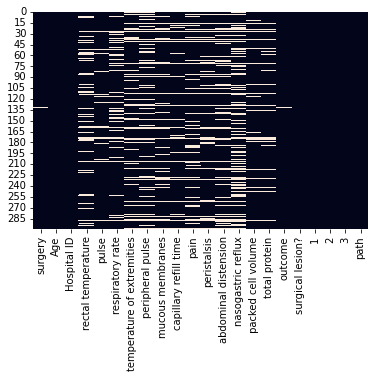

In [ ]:
#Heatmap for missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

surgery                         1
Age                             0
Hospital ID                     0
rectal temperature             60
pulse                          24
respiratory rate               58
temperature of extremities     56
peripheral pulse               69
mucous membranes               47
capillary refill time          32
pain                           55
peristalsis                    44
abdominal distension           56
nasogastric reflux            106
 packed cell volume            29
total protein                  33
outcome                         1
surgical lesion?                0
1                               0
2                               0
3                               0
path                            0
dtype: int64


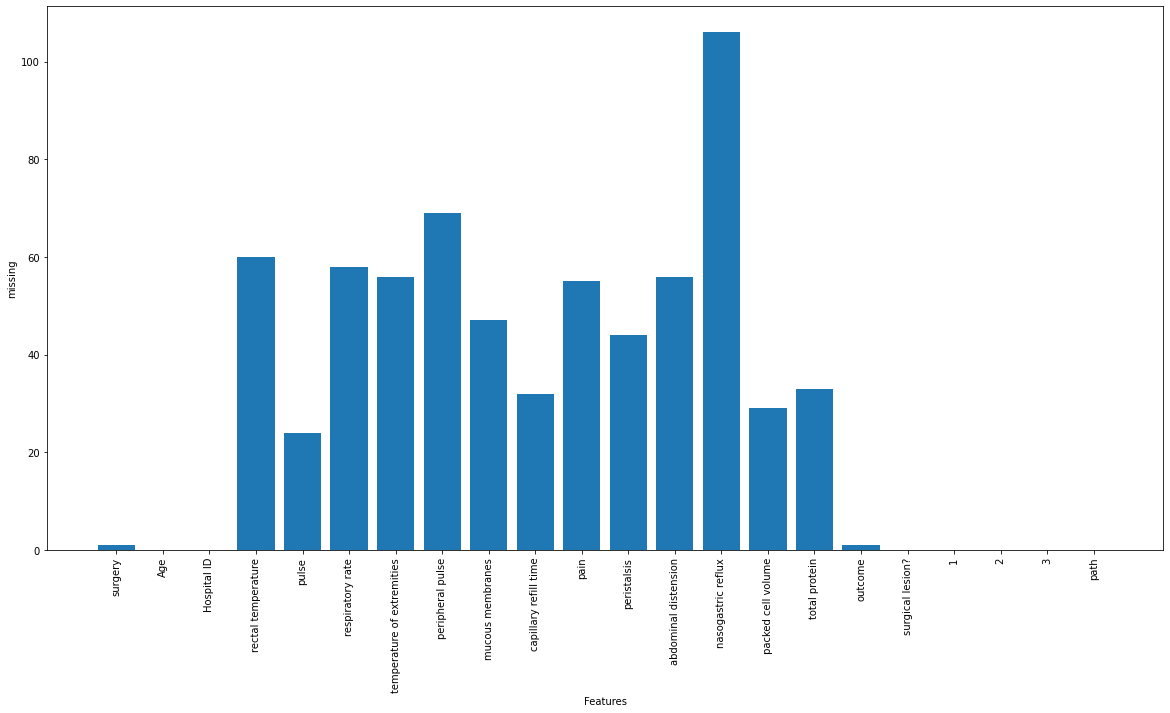

In [ ]:
#BarGraph of missing values for clearer visualisation
null = df.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(df.columns))), list(df.columns.values), rotation='vertical')
plt.show

print(null)

In [ ]:
#Columns containing NaN values
null = pd.concat([df.isnull().sum()], axis = 1, keys = ['NA'] )
null.loc[(null.NA>0)]

,NA
surgery,1
rectal temperature,60
pulse,24
respiratory rate,58
temperature of extremities,56
peripheral pulse,69
mucous membranes,47
capillary refill time,32
pain,55
peristalsis,44


In [ ]:
#Filtering columns having continous variables 
for col in df.columns.values:
    if (len(df[col].value_counts())> 5) and (df[col].isnull().sum() > 0):
        print(col)

In [ ]:
#Filling columns containing continous variables with MEAN
df['surgery'].fillna(df['surgery'].mode()[0], inplace = True)
df['rectal temperature'].fillna(df['rectal temperature'].mean(), inplace = True)
df['pulse'].fillna(df['pulse'].mean(), inplace = True)
df['respiratory rate'].fillna(df['pulse'].mean(), inplace = True)
df['mucous membranes'].fillna(df['pulse'].mean(), inplace = True)
df[' packed cell volume'].fillna(df['pulse'].mean(), inplace = True)
df['total protein'].fillna(df['total protein'].mean(), inplace = True)

##Filling columns containing categorical variables with MODE
for col in df.columns.values:
    if (df[col].isnull().sum()>=0):  
        if (df[col].dtype == 'float64'):
            df[col].fillna(df[col].mode()[0], inplace = True)

In [ ]:
null = pd.concat([df.isnull().sum()], axis = 1, keys = ['NA'])
null.loc[(null['NA']>0)]               

,NA
pain,55
outcome,1


# For a better insight and efficiency let's find correlation between features and "outcome" which is our target variable

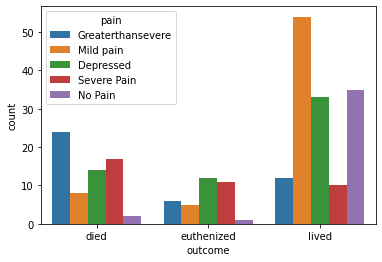

In [ ]:
#Finding relations between features and taget variable(outcome) by visualising data
#Relation between outcome and degree of pain experienced by the horse
sns.countplot(data=df, x='outcome', hue = 'pain')


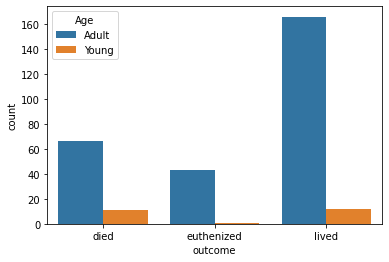

In [ ]:
#Relation between outcome and degree of age of the horse

sns.countplot(data=df, x='outcome', hue = 'Age')

## Data Processing for analysis

In [ ]:
#Converting variables to categorical datatype for better analysis
df['outcome'] = df['outcome'].astype('category').cat.codes
df['Age'] = df['Age'].astype('category').cat.codes
df['pain'] = df['pain'].astype('category').cat.codes

In [ ]:
#Finding correlation between features and target variables
corr= df.corr()

In [ ]:
core = abs(corr.outcome.sort_values(ascending = False))
core.sort_values(ascending = False)

outcome                       1.000000
 packed cell volume           0.348252
surgical lesion?              0.335366
pulse                         0.332151
peripheral pulse              0.306622
peristalsis                   0.289940
temperature of extremities    0.285713
abdominal distension          0.273972
capillary refill time         0.258909
total protein                 0.224141
surgery                       0.194000
nasogastric reflux            0.181624
Hospital ID                   0.101846
respiratory rate              0.100203
2                             0.099039
1                             0.098606
Age                           0.097889
path                          0.070761
3                             0.044610
rectal temperature            0.018860
pain                          0.018624
mucous membranes              0.006884
Name: outcome, dtype: float64

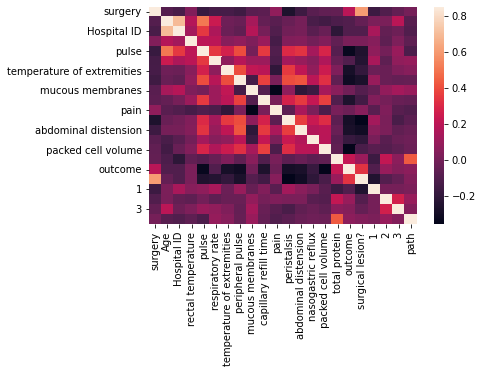

In [ ]:
#Heatmap of correlations
sns.heatmap(corr, vmax=0.85)

In [ ]:
df.drop('path',axis = 1 , inplace = True)
df.drop('3',axis = 1 , inplace = True)
df.drop('rectal temperature',axis = 1 , inplace = True)
df.drop('pain',axis = 1 , inplace = True)
df.drop('mucous membranes',axis = 1 , inplace = True)

## Importing Test Dataset

In [ ]:
columns = ['surgery','Age','Hospital ID','rectal temperature','pulse','respiratory rate','temperature of extremities','peripheral pulse',"mucous membranes",'capillary refill time','pain','peristalsis','abdominal distension','nasogastric tube','nasogastric reflux','nasogastric reflux PH','rectal examination - feces','abdomen',' packed cell volume','total protein','abdominocentesis appearance','abdomcentesis total protein','outcome','surgical lesion?','1','2','3','path']
dfs = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test', sep = ' ', header = None, na_values='?', names = columns)

In [ ]:
display(dfs.head())
display(len(dfs.columns))
display(dfs.info())
display(dfs.shape)

,surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,1,2,3,path
0,2.0,1,528626,38.5,54.0,20.0,NaN,1.0,2.0,2.0,3.0,4.0,1.0,2.0,2.0,5.9,NaN,2.0,42.0,6.3,NaN,NaN,1.0,2,3111,0,0,1
1,2.0,1,527950,37.6,48.0,36.0,NaN,NaN,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,44.0,6.3,1.0,5.0,1.0,2,3111,0,0,1
2,1.0,1,535263,37.7,44.0,28.0,NaN,4.0,3.0,2.0,5.0,4.0,4.0,1.0,1.0,NaN,3.0,5.0,45.0,70.0,3.0,2.0,1.0,1,3205,0,0,2
3,1.0,1,534523,37.0,56.0,24.0,3.0,1.0,4.0,2.0,4.0,4.0,3.0,1.0,1.0,NaN,NaN,NaN,35.0,61.0,3.0,2.0,3.0,2,2205,2208,0,2
4,2.0,1,528926,38.0,42.0,12.0,3.0,NaN,3.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,37.0,5.8,NaN,NaN,1.0,2,3111,0,0,2


28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      67 non-null     float64
 1   Age                          68 non-null     int64  
 2   Hospital ID                  68 non-null     int64  
 3   rectal temperature           59 non-null     float64
 4   pulse                        66 non-null     float64
 5   respiratory rate             55 non-null     float64
 6   temperature of extremities   59 non-null     float64
 7   peripheral pulse             54 non-null     float64
 8   mucous membranes             67 non-null     float64
 9   capillary refill time        62 non-null     float64
 10  pain                         60 non-null     float64
 11  peristalsis                  60 non-null     float64
 12  abdominal distension         59 non-null     float64
 13  nasogastric tube      

None

(68, 28)

## Cleaning Test dataset

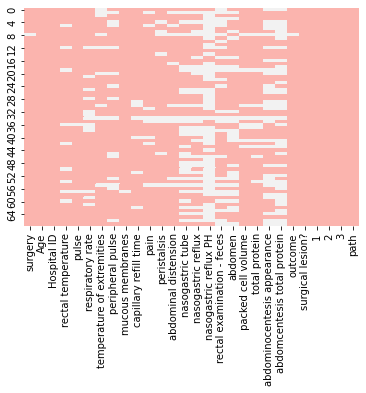

In [ ]:
#Visualising missing data
sns.heatmap(dfs.isnull(),cbar=False, cmap='Pastel1')

## White blank spaces account for the missing data in the entire dataframe represented by Pink

surgery                         1
Age                             0
Hospital ID                     0
rectal temperature              9
pulse                           2
respiratory rate               13
temperature of extremities      9
peripheral pulse               14
mucous membranes                1
capillary refill time           6
pain                            8
peristalsis                     8
abdominal distension            9
nasogastric tube               27
nasogastric reflux             27
nasogastric reflux PH          52
rectal examination - feces     26
abdomen                        25
 packed cell volume             8
total protein                  10
abdominocentesis appearance    29
abdomcentesis total protein    37
outcome                         1
surgical lesion?                0
1                               0
2                               0
3                               0
path                            0
dtype: int64


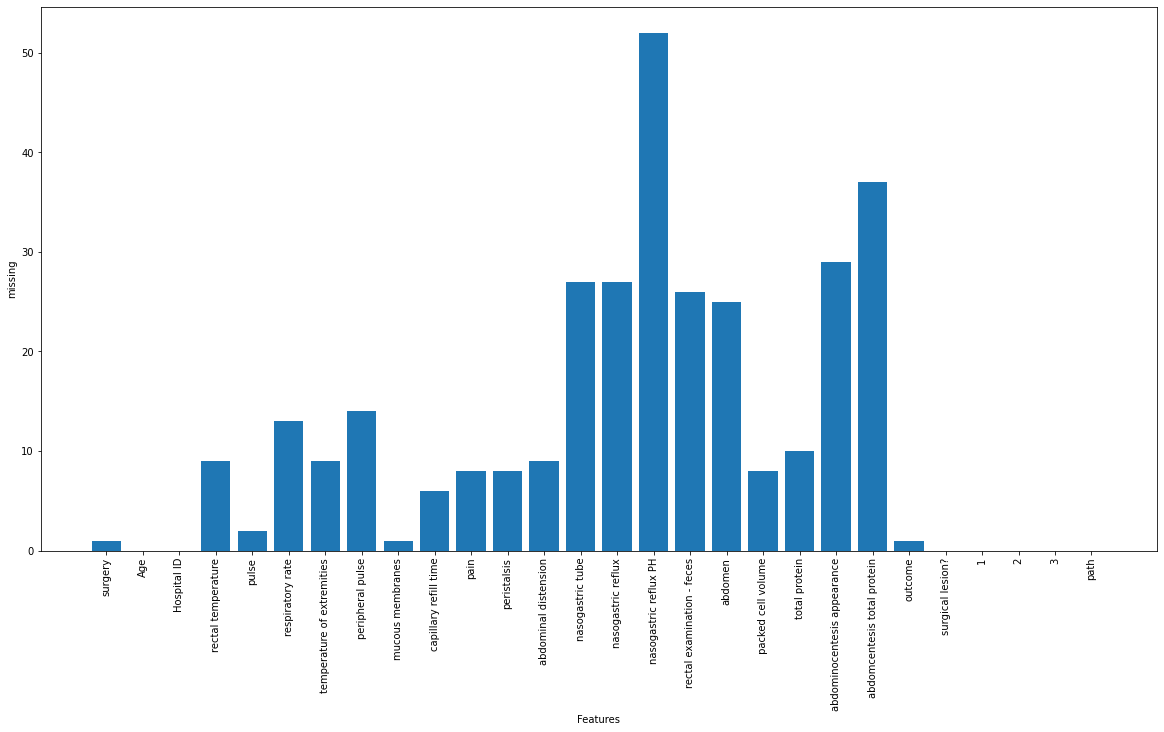

In [ ]:
null = dfs.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(dfs.columns))), list(dfs.columns.values), rotation='vertical')
plt.show

print(null)

In [ ]:
#Dropping columns with significant number of missing values
dfs.drop('nasogastric reflux PH', axis=1, inplace = True)
dfs.drop('abdomcentesis total protein', axis=1, inplace = True)
dfs.drop('abdominocentesis appearance', axis=1, inplace = True)
dfs.drop('nasogastric tube', axis=1, inplace = True)
dfs.drop('abdomen', axis=1, inplace = True)
dfs.drop('rectal examination - feces', axis=1, inplace = True)

Removing columns which have insignificant impact on our target variable "outcome" (corr<.9) as seen from Train dataset


In [ ]:
dfs.drop('path',axis = 1 , inplace = True)
dfs.drop('3',axis = 1 , inplace = True)
dfs.drop('rectal temperature',axis = 1 , inplace = True)
dfs.drop('pain',axis = 1 , inplace = True)
dfs.drop('mucous membranes',axis = 1 , inplace = True)

# Processing Test dataset before analysis

In [ ]:
dfs['Age'].replace({9:2}, inplace = True)
dfs['outcome'].replace({1:'lived', 2:'died', 3:'euthenized'}, inplace = True)
dfs['Age'].replace({1:'Adult', 2:'Young'}, inplace = True)


In [ ]:
null = pd.concat([dfs.isnull().sum()], axis = 1, keys = ['NA'] )
null.loc[(null.NA>0)]

,NA
surgery,1
pulse,2
respiratory rate,13
temperature of extremities,9
peripheral pulse,14
capillary refill time,6
peristalsis,8
abdominal distension,9
nasogastric reflux,27
packed cell volume,8


In [ ]:
df

,surgery,Age,Hospital ID,pulse,respiratory rate,temperature of extremities,peripheral pulse,capillary refill time,peristalsis,abdominal distension,nasogastric reflux,packed cell volume,total protein,outcome,surgical lesion?,1,2
0,2.0,0,530101,66.0,28.0,3.0,3.0,2.0,4.0,4.0,1.0,45.0,8.400000,0,2,11300,0
1,1.0,0,534817,88.0,20.0,3.0,1.0,1.0,4.0,2.0,1.0,50.0,85.000000,1,2,2208,0
2,2.0,0,530334,40.0,24.0,1.0,1.0,1.0,3.0,1.0,1.0,33.0,6.700000,2,2,0,0
3,1.0,1,5290409,164.0,84.0,4.0,1.0,2.0,4.0,4.0,2.0,48.0,7.200000,0,1,2208,0
4,2.0,0,530255,104.0,35.0,3.0,1.0,2.0,3.0,1.0,1.0,74.0,7.400000,0,2,4300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0,533886,120.0,70.0,4.0,1.0,2.0,4.0,1.0,1.0,55.0,65.000000,1,2,3205,0
296,2.0,0,527702,72.0,24.0,3.0,2.0,2.0,3.0,3.0,1.0,44.0,24.456929,1,1,2208,0
297,1.0,0,529386,72.0,30.0,4.0,3.0,1.0,4.0,3.0,1.0,60.0,6.800000,0,1,3205,0
298,1.0,0,530612,100.0,24.0,3.0,3.0,1.0,3.0,3.0,1.0,50.0,6.000000,2,1,2208,0


In [ ]:
dfs

,surgery,Age,Hospital ID,pulse,respiratory rate,temperature of extremities,peripheral pulse,capillary refill time,peristalsis,abdominal distension,nasogastric reflux,packed cell volume,total protein,outcome,surgical lesion?,1,2
0,2.0,0,528626,54.0,20.0,3.0,1.0,2.0,4.0,1.0,2.0,42.0,6.3,2,2,3111,0
1,2.0,0,527950,48.0,36.0,3.0,1.0,1.0,3.0,1.0,1.0,44.0,6.3,2,2,3111,0
2,1.0,0,535263,44.0,28.0,3.0,4.0,2.0,4.0,4.0,1.0,45.0,70.0,2,1,3205,0
3,1.0,0,534523,56.0,24.0,3.0,1.0,2.0,4.0,3.0,1.0,35.0,61.0,1,2,2205,2208
4,2.0,0,528926,42.0,12.0,3.0,1.0,1.0,3.0,1.0,1.0,37.0,5.8,2,2,3111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2.0,0,529695,60.0,30.0,1.0,1.0,1.0,2.0,2.0,1.0,40.0,6.0,2,1,3205,0
64,2.0,0,528452,42.0,40.0,1.0,1.0,1.0,3.0,1.0,1.0,36.0,6.2,2,2,4124,0
65,1.0,0,534783,60.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,44.0,65.0,1,1,2209,0
66,2.0,0,528926,42.0,12.0,3.0,1.0,1.0,1.0,1.0,1.0,37.0,5.8,2,2,3111,0


In [ ]:
dfs['outcome'] = dfs['outcome'].astype('category').cat.codes
dfs['Age'] = dfs['Age'].astype('category').cat.codes

In [ ]:
#Separating features and target variable from both test and train dataset
xtrain = df.drop("outcome", axis=1)
ytrain = df["outcome"]
xtest  = dfs.drop("outcome", axis=1)
ytest  = dfs["outcome"]

In [ ]:
xtrain.head()

,surgery,Age,Hospital ID,pulse,respiratory rate,temperature of extremities,peripheral pulse,capillary refill time,peristalsis,abdominal distension,nasogastric reflux,packed cell volume,total protein,surgical lesion?,1,2
0,2.0,0,530101,66.0,28.0,3.0,3.0,2.0,4.0,4.0,1.0,45.0,8.4,2,11300,0
1,1.0,0,534817,88.0,20.0,3.0,1.0,1.0,4.0,2.0,1.0,50.0,85.0,2,2208,0
2,2.0,0,530334,40.0,24.0,1.0,1.0,1.0,3.0,1.0,1.0,33.0,6.7,2,0,0
3,1.0,1,5290409,164.0,84.0,4.0,1.0,2.0,4.0,4.0,2.0,48.0,7.2,1,2208,0
4,2.0,0,530255,104.0,35.0,3.0,1.0,2.0,3.0,1.0,1.0,74.0,7.4,2,4300,0


In [ ]:
xtest.head()

,surgery,Age,Hospital ID,pulse,respiratory rate,temperature of extremities,peripheral pulse,capillary refill time,peristalsis,abdominal distension,nasogastric reflux,packed cell volume,total protein,surgical lesion?,1,2
0,2.0,0,528626,54.0,20.0,3.0,1.0,2.0,4.0,1.0,2.0,42.0,6.3,2,3111,0
1,2.0,0,527950,48.0,36.0,3.0,1.0,1.0,3.0,1.0,1.0,44.0,6.3,2,3111,0
2,1.0,0,535263,44.0,28.0,3.0,4.0,2.0,4.0,4.0,1.0,45.0,70.0,1,3205,0
3,1.0,0,534523,56.0,24.0,3.0,1.0,2.0,4.0,3.0,1.0,35.0,61.0,2,2205,2208
4,2.0,0,528926,42.0,12.0,3.0,1.0,1.0,3.0,1.0,1.0,37.0,5.8,2,3111,0


# Data Fitting and Predicition

Mean Absolute Error: 0.5970149253731343
Accuracy: 0.6417910447761194
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        12
           1      0.000     0.000     0.000         8
           2      0.683     0.915     0.782        47

    accuracy                          0.642        67
   macro avg      0.228     0.305     0.261        67
weighted avg      0.479     0.642     0.548        67



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


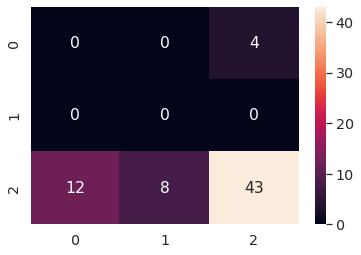

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(xtrain)
X_test = min_max_scaler.transform(xtest)
clf = LogisticRegression(max_iter = 200)
clf.fit(xtrain, ytrain)

# Use the forest's predict method on the test data
y_pred = clf.predict(xtest)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Accuracy: %s' % metrics.accuracy_score(ytest, y_pred))
print(metrics.classification_report(ytest, y_pred, digits=3))
cm = metrics.confusion_matrix(y_pred, ytest)
sns.set(font_scale=1.3)
sns.heatmap(cm, annot=True)
plt.show() # 0: died, 1: euthanized, 2: lived

# **Conclusion:** 

1.   I learned how one can deal with raw data and how to preprocess the data and structure it.

2.   Able to visualize the data in proper EDA format and was able to apply logistic regression to the structure data and achieved an accuracy of 64.5\%

